# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how= 'left', on= 'Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = len(df['Mouse ID'].unique())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep= False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep= False)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(cleaned_df['Mouse ID'].unique())
number_of_mice

249

## Summary Statistics

In [7]:
TV_STDev = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(np.std)
TV_STDev


Drug Regimen
Capomulin    4.983904
Ceftamin     6.250556
Infubinol    6.548770
Ketapril     8.257659
Naftisol     8.112811
Placebo      7.799368
Propriva     6.615279
Ramicane     4.835669
Stelasyn     7.689090
Zoniferol    6.947423
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
TV_mean = tumor_volume.apply(np.mean)
TV_median = tumor_volume.apply(np.median)
TV_variance = tumor_volume.apply(np.var)
TV_STDev = tumor_volume.apply(np.std)
TV_SEM = tumor_volume.apply(st.sem)
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_summary_df = pd.DataFrame({
    'Mean Tumor Volume': TV_mean,
    'Median Tumor Volume': TV_median,
    'Tumor Volume Variance': TV_variance,
    'Tumor Volume Std. Dev.': TV_STDev,
    'Tumor Volume Std. Err.': TV_SEM
})

tumor_volume_summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.458254,50.854632,43.761912,6.615279,0.540135
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_and_regimens = pd.DataFrame(cleaned_df.groupby('Drug Regimen')['Timepoint'].count())
timepoints_and_regimens


,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,151
Ramicane,228
Stelasyn,181


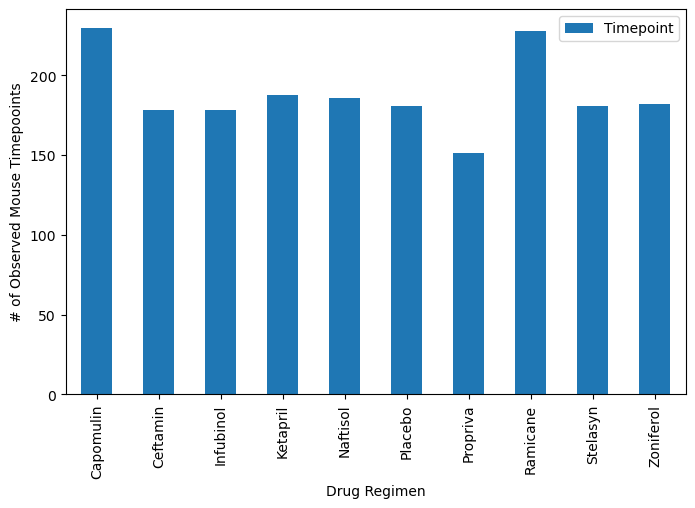

In [11]:
timepoints_and_regimens.plot(kind= 'bar', figsize= (8, 5))
plt.ylabel('# of Observed Mouse Timepooints')
plt.show()


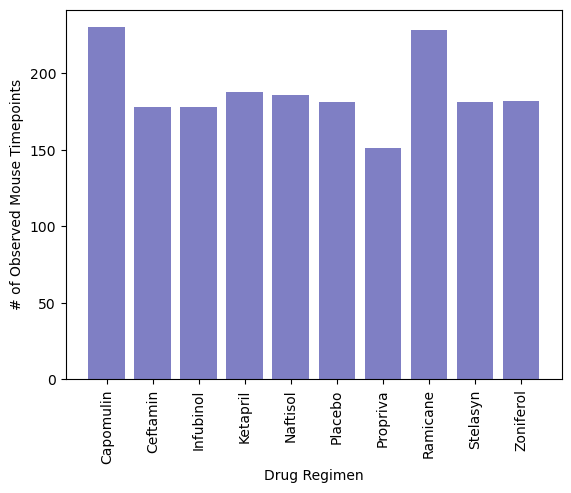

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = timepoints_and_regimens.index
y_axis = timepoints_and_regimens['Timepoint']
plt.bar(x_axis, y_axis, color= 'darkblue', alpha= 0.5, align= 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
                            'Propriva', 'Ramicane', 'Stelasyn','Zoniferol'])
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

In [13]:
#Pulling the data for the pie chart
male_vs_female_df = pd.DataFrame(cleaned_df.groupby('Sex')['Mouse ID'].count())
male_vs_female_df


,Mouse ID
Sex,
Female,925
Male,958


array([<Axes: ylabel='Mouse ID'>], dtype=object)

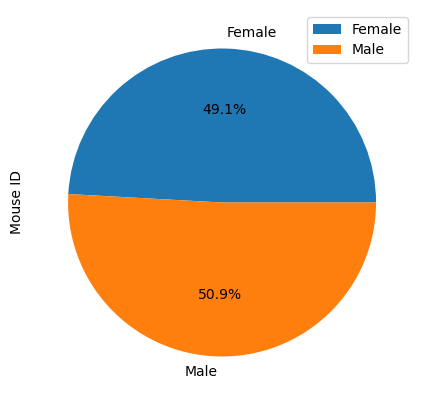

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female_df.plot(kind= 'pie', figsize=(5,5), subplots= True, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x13f0e9990>,
 [Text(-0.030277540496141186, -1.099583225836728, 'Female'),
  Text(0.03027754049614132, 1.099583225836728, 'Male')],
 [Text(-0.01651502208880428, -0.5997726686382152, '49.1%'),
  Text(0.016515022088804353, 0.5997726686382152, '50.9%')])

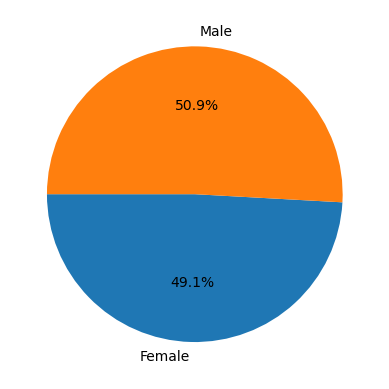

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(male_vs_female_df['Mouse ID'], labels= male_vs_female_df.index, autopct='%1.1f%%', startangle=180)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


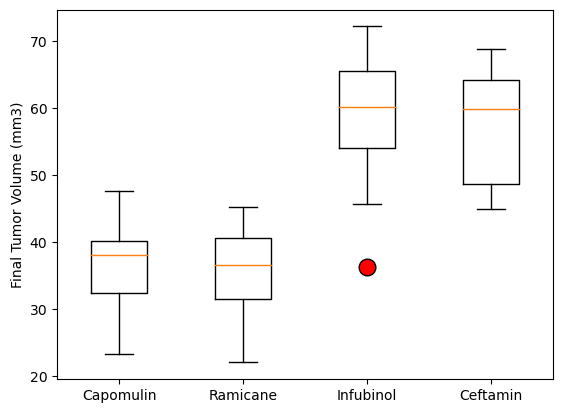

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [25]:
#Data on the tumor volume vs. time point for a single mouse treated with Capomulin
grouped = cleaned_df.groupby('Mouse ID')
capomulin_mouse_df = grouped.get_group('l509')
capomulin_mouse_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


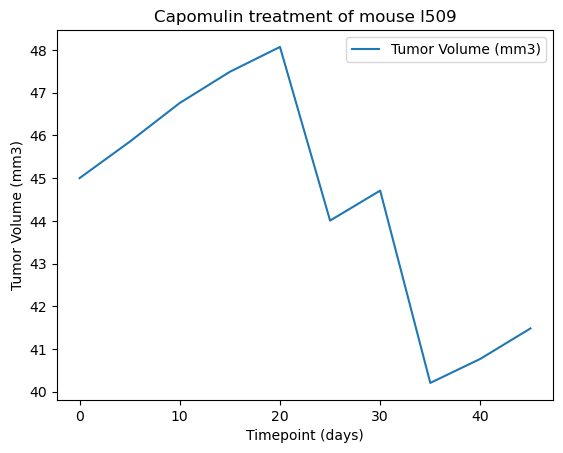

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse_df.plot(kind='line', x= 'Timepoint', y= 'Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [43]:
# Putting together the data for the scatterplot
group = cleaned_df.groupby('Drug Regimen')
df = group.get_group('Capomulin')

average_volume = pd.DataFrame(df.groupby('Weight (g)')['Tumor Volume (mm3)'].mean())
average_volume


,Tumor Volume (mm3)
Weight (g),
15,36.182040
17,37.214133
19,41.182391
20,39.141053
21,42.088700
22,43.288490
23,43.341051
24,44.805810
25,44.062109


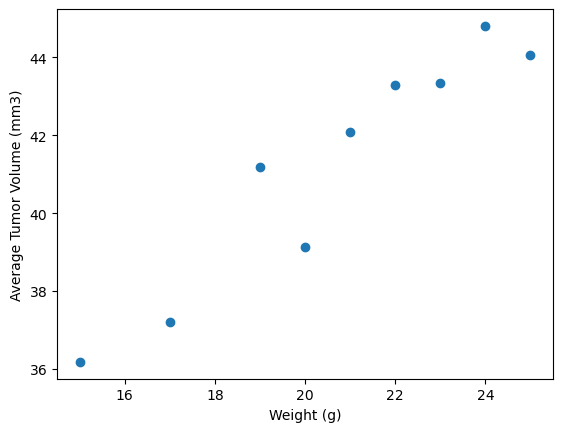

In [44]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_values = average_volume.index
y_values = average_volume['Tumor Volume (mm3)']
plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

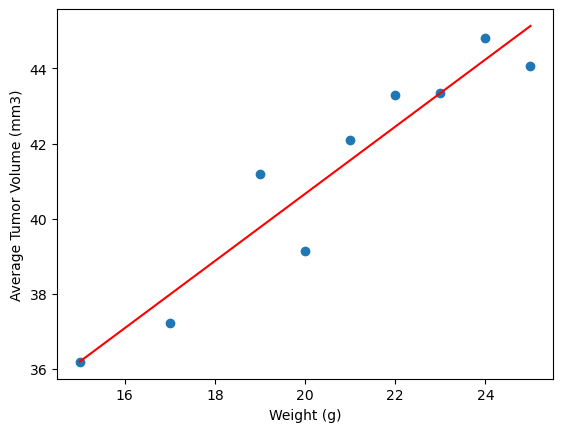

In [45]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()